# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

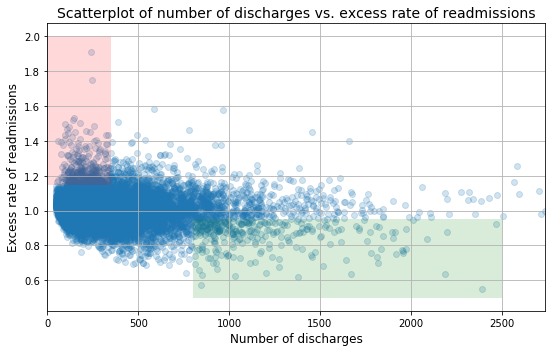

In [11]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Part A

I agree that there appears to be a downward trend in readmissions as the discharge level increases, but the correlation does not appear to be significant.

In [5]:
# drop rows with nan values for Excess Readmission Ratio and Number of Discharges
clean_hospital_read_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio', 'Number of Discharges'])


In [6]:
print('hospitals/facilities with number of discharges < 100')
low_discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100] 
low_discharges_mean_err = low_discharges['Excess Readmission Ratio'].mean()
low_discharges_pct_err = low_discharges[low_discharges['Excess Readmission Ratio']>1]['Excess Readmission Ratio'].count()/len(low_discharges['Excess Readmission Ratio'])
print('Avg Excess Readmission Rate: ', low_discharges_mean_err)
print('Pct of Excess Readmission Rate > 1: ', low_discharges_pct_err)

print('hospitals/facilities with number of discharges > 1000')
high_discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000] 
high_discharges_mean_err = high_discharges['Excess Readmission Ratio'].mean()
high_discharges_pct_err = high_discharges[high_discharges['Excess Readmission Ratio']>1]['Excess Readmission Ratio'].count()/len(high_discharges['Excess Readmission Ratio'])
print('Avg Excess Readmission Rate: ', high_discharges_mean_err)
print('Pct of Excess Readmission Rate > 1: ', high_discharges_pct_err)


### Part B

**1. Hypothesis test** <br>
H0: There is no correlation between 'Excess Readmission Rate' and 'Number of Discharges' <br>
H1: There is a correlation

In [7]:
from scipy.stats import pearsonr


# store the Excess Readmission Ratio and Number of Discharges values in numpy arrays
err_orig = clean_hospital_read_df['Excess Readmission Ratio'].values
discharge_orig = clean_hospital_read_df['Number of Discharges'].values

# compute the correlation between the 'Excess Readmission Ratio' and the 'Number of Discharges'
corr_obs = pearsonr(err_orig,discharge_orig)[0]
print(corr_obs)

In [8]:
# create replicates:
def drawReplicates(variable1, variable2, size=10000):
    # initialize permutation replicates
    replicates = np.empty(size)
    
    # create (size) replicates
    for i in range(size):
        variable1_perm = np.random.permutation(variable1)
        replicates[i] = np.corrcoef(variable1_perm, variable2)[0,1]
        #replicates[i] = pearsonr(variable1_perm, variable2)[0]
        
    return replicates

**2. Compute and report the observed significance value (or p-value)**

In [9]:
replicates = drawReplicates(err_orig, discharge_orig, size=1000000)
pval = np.sum(replicates<=corr_obs)/len(replicates)
print('p-val =', pval)

p-val = 0.0


**3. Report statistical significance for  𝛼  = .01** <br>
With an alpha of 0.01, there is a 1% risk of concluding that there is a correlation when there is no actual correlation. The observed correlation of -0.097 is statistically signficant at the 0.01 level. <br>

The p-value of 0 indicates there is a very small probability (no probability, based on replicate size) of obtaining a correlation at least as extreme as -0.097, assuming the null hypothesis is true.

We should also ask whether there is a true difference in the mean Excess Readmission Rate for small hospitals 
(discharges < 100) and large hospitals (discharges > 1000) <br>

**Perform hypothesis test**<br>
H0: Mean Excess Readmission Rate Small Hospitals - Mean Excess Readmission Rate Large Hospitals = 0 <br>
H1: Mean Excess Readmission Rate Small Hospitals - Mean Excess Readmission Rate Large Hospitals > 0

In [59]:
df_small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
df_large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

In [60]:
print(df_small.shape)
print(df_large.shape)

(1188, 12)
(463, 12)


In [62]:
obs_diff_mean = low_discharges_mean_err-high_discharges_mean_err
obs_diff_mean

0.04428292900204345

In [70]:
from sklearn.utils import resample
def getReplicates(data1, data2, size=10000):
    df = pd.concat([data1, data2])
    replicates = np.empty(size)
    
    for i in range(size):
        data_resampled = resample(df)
        data_resampled_1 = data_resampled[:len(data1)]
        data_resampled_2 = data_resampled[len(data1):]
        replicates[i] = data_resampled_1['Excess Readmission Ratio'].mean() - data_resampled_2['Excess Readmission Ratio'].mean()
        
    return replicates

In [76]:
# what is the probability of seeing a difference of 0.04 assuming there is no difference in Excess Readmission Ratios
# between small and large hospitals?
pval = np.sum(replicates >= obs_diff_mean) / 10000

In [78]:
# given the pvalue of .0004, we can reject the null hypothesis at the .01 level.
pval

0.0004

**4. Statistical significance versus practical significance. Do they differ here? How does this change your recommendation to the client?** <br>

While the analysis shows that the observed correlation of -0.097 is statistically significant at the 0.01 level, a correlation of this level is not considered a strong correlation.  Regulatory policies should not be recommended based solely on this observed correlation, given the fact it is a weak correlation.  

However, a test of whether there is a true difference in the mean Excess Readmission Rate between small and large capacity hospitals shows that there is a statistically significant difference (although, that difference is also small).  My recommendation would be to examine other factors to determine if these other factors have a stronger correlation to readmission rate.  Factors specific to lower capacity hospitals should also be explored for correlation.   

**5. Advantages/disadvantages of the scatterplot to convey information, and construction of another plot that conveys the same information in a more direct manner.**

The advantages to using a scatterplot to convey correlation is that the relationship between two variables is made visually apparent.  The issue with using this tool for detecting correlations is that relationships between variables can be exaggerated or misrepresented based on the data that is included, axes used, or other included or excluded features of the chart.  In particular, outliers can change the strength and visual representation of a correlation.  Including a line based on the linear relationship between the two variables is helpful.

In [33]:
from scipy import stats
from numpy.polynomial.polynomial import polyfit

In [34]:
# make a copy of the dataframe to do additional manipulations without changing the original dataframe
df = clean_hospital_read_df.copy(deep=True)


In [35]:
from scipy import stats

zscores_err = stats.zscore(df['Excess Readmission Ratio'])
zscores_dis = stats.zscore(df['Number of Discharges'])
df['z_Excess Readmission Ratio'] = zscores_err
df['z_Number of Discharges'] = zscores_dis
df.shape

(11497, 14)

In [36]:
# remove outliers, defined as any value greater than abs(3) standard deviations from mean
df_no_outliers = df[df['z_Excess Readmission Ratio']<3]
df_no_outliers = df[df['z_Number of Discharges']<3]
df_no_outliers.shape

(11289, 14)

In [42]:

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in df_no_outliers['Number of Discharges'][:]]
y = list(df_no_outliers['Excess Readmission Ratio'][:])

# create the line to superimpose on the plot
b, m = polyfit(x, y, 1)
values = [b + m * a for a in x]

1.0190061942020952 -3.2029048814398915e-05


11289

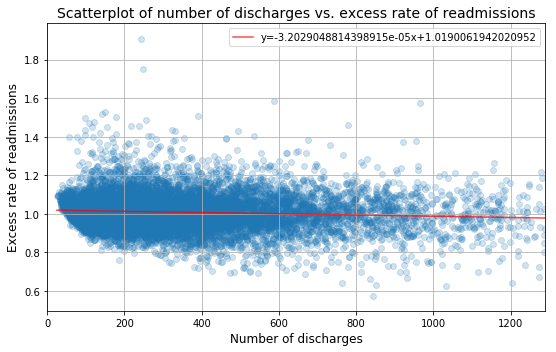

In [53]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.plot(x, values, '-', color='red', alpha=0.7, label='y={}x+{}'.format(m,b))

#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)
plt.legend()

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()